In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from constants import ETH_TOKEN, TIMEFRAME, PERIODS

In [2]:
df = pd.read_csv(f'datasets/full/data_with_statistics_{ETH_TOKEN}_{TIMEFRAME}_full.csv')

In [3]:
df.head()

,timestamp,open,high,low,close,volume,market_cap,volatility,growth,ma7,...,bb-ub,bb-lb,fr-0.236,fr-0.382,fr-0.5,fr-0.618,macd,signal,obv,label
0,2017-11-23,380.63,425.00,370.02,405.00,25409.00111,3.934041e+10,0.216828,24.37,363.890000,...,372.721883,256.430895,375.75724,357.66638,343.045,328.42362,10.624226,6.039543,-7567.20153,63.97
1,2017-11-24,405.03,475.00,392.80,469.00,30398.35831,4.556002e+10,0.257292,63.97,383.571429,...,396.622894,241.437662,424.65324,397.21838,375.045,352.87162,14.425279,7.564222,22831.15678,-5.75
2,2017-11-25,467.57,484.47,450.00,461.82,21428.63117,4.474109e+10,0.257489,-5.75,400.022857,...,414.219154,232.580846,424.65324,397.21838,375.045,352.87162,17.104767,9.298867,1402.52561,1.84
3,2017-11-26,461.00,465.00,436.14,462.84,21691.11759,4.523564e+10,0.255834,1.84,415.550000,...,429.523336,226.382219,424.65324,397.21838,375.045,352.87162,19.157294,11.091308,23093.64320,9.47
4,2017-11-27,462.84,486.94,453.00,472.31,23761.11416,4.611156e+10,0.254129,9.47,430.534286,...,444.552269,221.271064,427.18208,399.26396,376.700,354.13604,20.999677,12.892830,46854.75736,-6.15


In [4]:
df.tail()

,timestamp,open,high,low,close,volume,market_cap,volatility,growth,ma7,...,bb-ub,bb-lb,fr-0.236,fr-0.382,fr-0.5,fr-0.618,macd,signal,obv,label
2004,2023-05-20,1812.31,1828.87,1807.06,1819.42,127754.4349,2.189539e+11,0.144975,7.11,1813.434286,...,2061.314818,1709.170182,2042.11868,1994.76066,1956.485,1918.20934,-11.476622,-9.394929,4.024289e+07,-14.51
2005,2023-05-21,1819.42,1828.98,1797.21,1804.91,161517.8053,2.170329e+11,0.145031,-14.51,1814.248571,...,2040.586341,1714.026992,2042.11868,1994.76066,1956.485,1918.20934,-11.555674,-9.787792,4.008137e+07,12.44
2006,2023-05-22,1804.91,1828.27,1792.01,1817.35,237498.9423,2.185938e+11,0.144374,12.44,1814.412857,...,2010.799256,1727.074077,2030.52880,1985.38560,1948.900,1912.41440,-11.042757,-10.015968,4.031887e+07,36.69
2007,2023-05-23,1817.36,1872.50,1815.24,1854.05,396869.6097,2.230197e+11,0.145263,36.69,1818.675714,...,1986.078376,1739.575513,2030.52880,1985.38560,1948.900,1912.41440,-9.140811,-9.856848,4.071574e+07,-54.17
2008,2023-05-24,1854.06,1854.09,1777.60,1799.89,420846.1445,2.164850e+11,0.146510,-54.17,1815.500000,...,1947.833930,1760.952737,1946.33600,1917.28200,1893.800,1870.31800,-9.549811,-9.801023,4.029490e+07,-14.03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   2009 non-null   object 
 1   open        2009 non-null   float64
 2   high        2009 non-null   float64
 3   low         2009 non-null   float64
 4   close       2009 non-null   float64
 5   volume      2009 non-null   float64
 6   market_cap  2009 non-null   float64
 7   volatility  2009 non-null   float64
 8   growth      2009 non-null   float64
 9   ma7         2009 non-null   float64
 10  ma25        2009 non-null   float64
 11  ma99        2009 non-null   float64
 12  rsi         2009 non-null   float64
 13  std         2009 non-null   float64
 14  bb-mb       2009 non-null   float64
 15  bb-ub       2009 non-null   float64
 16  bb-lb       2009 non-null   float64
 17  fr-0.236    2009 non-null   float64
 18  fr-0.382    2009 non-null   float64
 19  fr-0.5      2009 non-null  

In [6]:
df.describe()

,open,high,low,close,volume,market_cap,volatility,growth,ma7,ma25,...,bb-ub,bb-lb,fr-0.236,fr-0.382,fr-0.5,fr-0.618,macd,signal,obv,label
count,2009.000000,2009.000000,2009.000000,2009.000000,2.009000e+03,2.009000e+03,2009.000000,2009.000000,2009.000000,2009.000000,...,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2.009000e+03,2009.000000
mean,1174.079582,1213.819557,1128.600806,1174.790946,5.971081e+05,1.371367e+11,0.288837,0.711364,1172.618315,1165.874464,...,1419.335389,903.870205,1295.617616,1228.822531,1174.837461,1120.852392,3.069813,3.103012,2.158610e+07,0.692250
std,1157.521520,1193.747459,1114.834935,1157.485082,4.943956e+05,1.385562e+11,0.105308,78.408471,1154.824763,1147.828882,...,1373.083049,936.909169,1255.666397,1196.245735,1148.957688,1102.419912,47.707487,44.906442,2.678736e+07,78.407381
min,83.750000,85.000000,81.790000,83.760000,1.051626e+04,8.751210e+09,0.129423,-936.160000,86.524286,100.414800,...,129.161353,46.558420,121.640000,117.298860,110.895000,104.491140,-178.090489,-157.783717,-9.905035e+06,-936.160000
25%,218.810000,225.000000,210.540000,218.810000,2.737299e+05,2.334713e+10,0.217931,-13.050000,218.491429,218.231200,...,257.743100,172.363608,238.400920,226.280700,216.980000,208.023600,-11.694162,-11.114268,-2.451326e+06,-13.060000
50%,635.150000,661.390000,593.400000,636.450000,4.734339e+05,6.731596e+10,0.274054,0.400000,627.422857,613.849200,...,819.525848,410.869338,713.156040,653.333820,613.610000,567.413580,0.598467,0.790329,7.193961e+06,0.350000
75%,1806.220000,1841.360000,1748.430000,1806.100000,7.731691e+05,2.168134e+11,0.328417,16.540000,1809.961429,1740.669600,...,2053.870922,1451.896878,1852.147560,1770.856220,1705.155000,1639.453780,15.572336,16.379538,4.729477e+07,16.500000
max,4807.980000,4868.000000,4713.890000,4807.980000,4.663240e+06,5.690943e+11,0.749408,551.800000,4689.190000,4472.497200,...,5000.723431,4019.339511,4616.565120,4498.147440,4402.440000,4306.732560,245.521651,212.710352,6.559706e+07,551.800000


In [7]:
from functions.data import visualize_data

g=visualize_data(df)

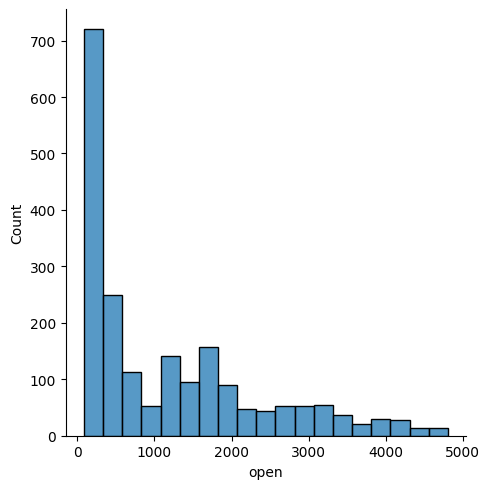

In [150]:
sns.displot(x="open", data=df)

<Axes: xlabel='open'>

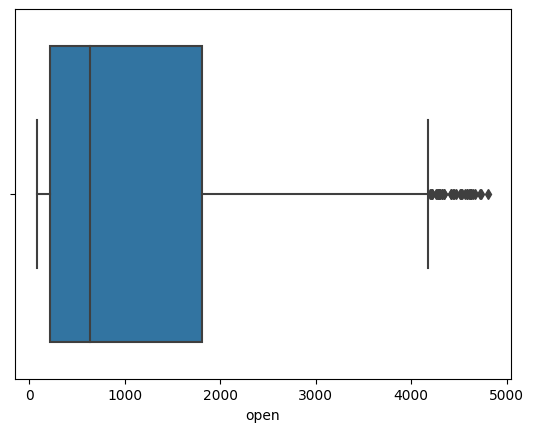

In [72]:
sns.boxplot(x="open", data=df)

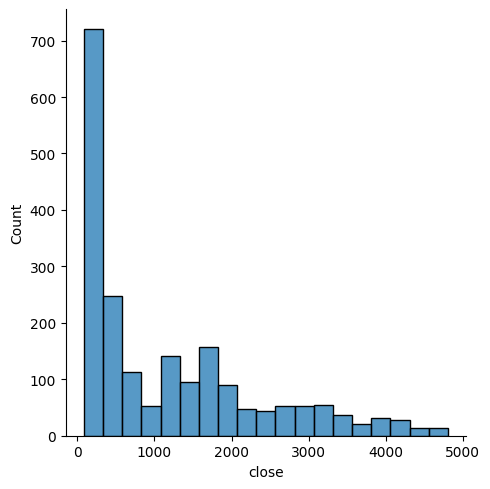

In [73]:
sns.displot(x="close", data=df)

<Axes: xlabel='close'>

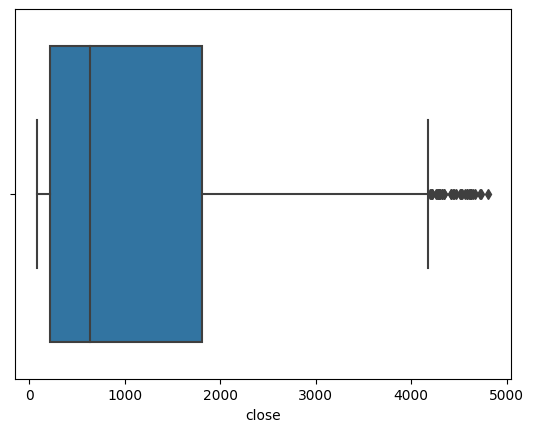

In [74]:
sns.boxplot(x="close", data=df)

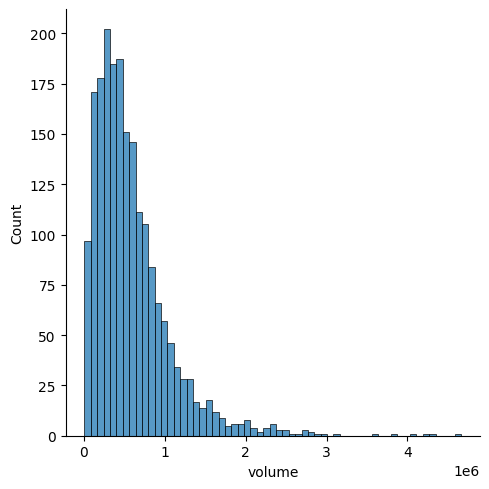

In [75]:
sns.displot(x="volume", data=df)

<Axes: xlabel='volume'>

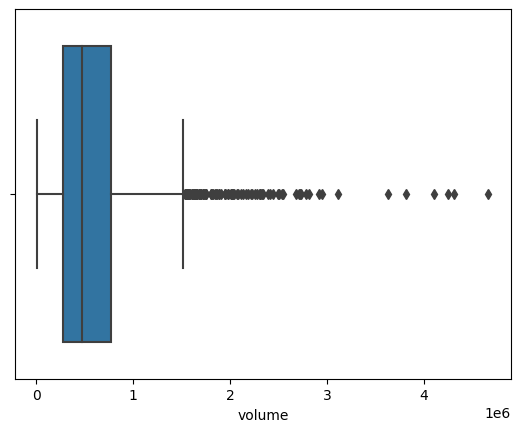

In [76]:
sns.boxplot(x="volume", data=df)

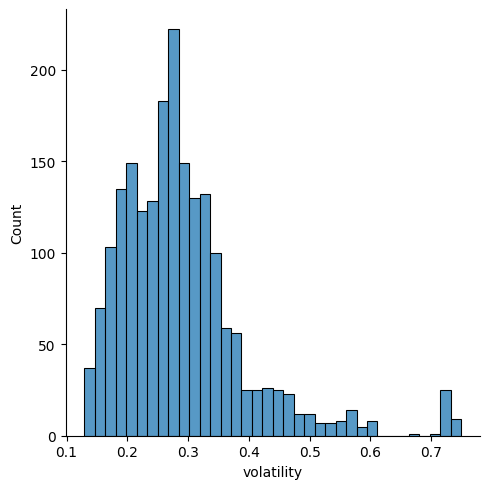

In [77]:
sns.displot(x="volatility", data=df)

<Axes: xlabel='volatility'>

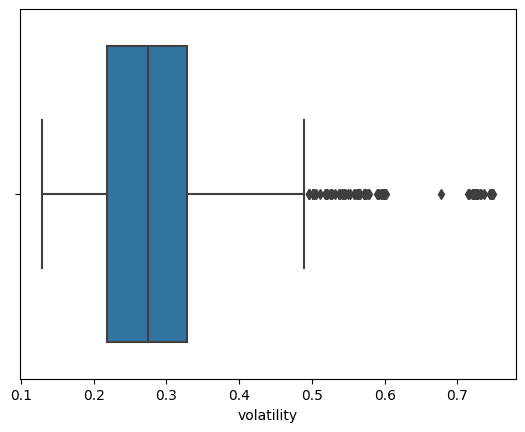

In [78]:
sns.boxplot(x="volatility", data=df)

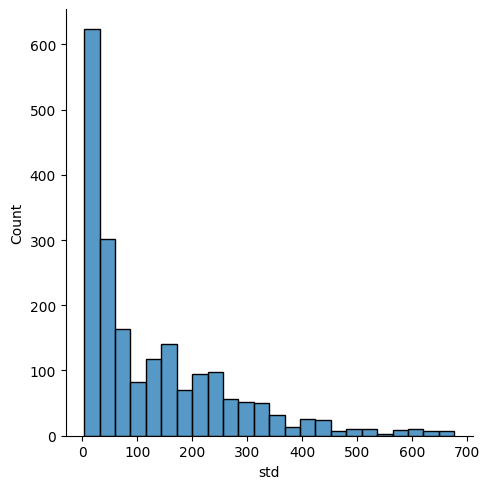

In [79]:
sns.displot(x="std", data=df)

<Axes: xlabel='std'>

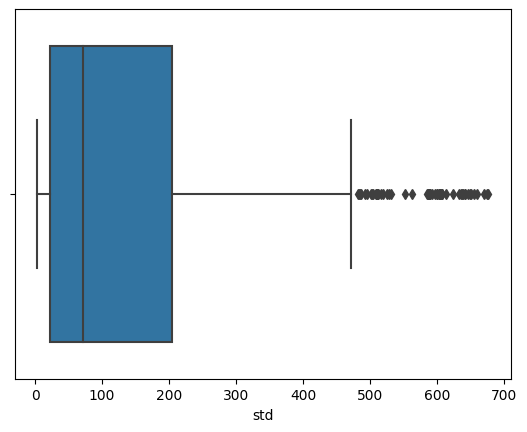

In [80]:
sns.boxplot(x="std", data=df)

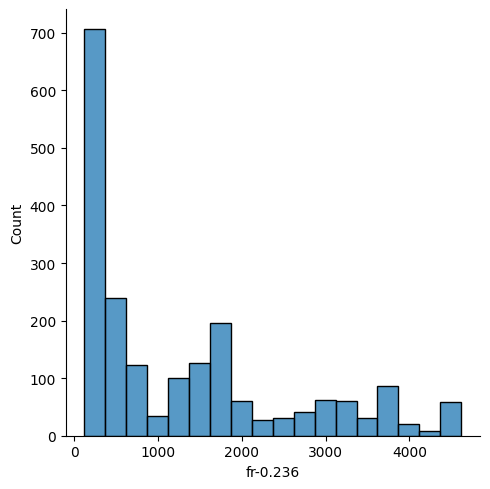

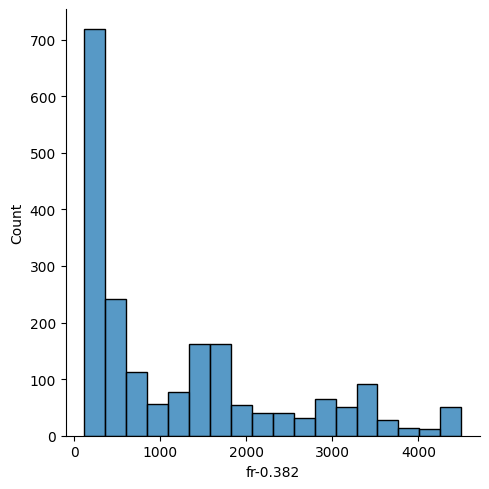

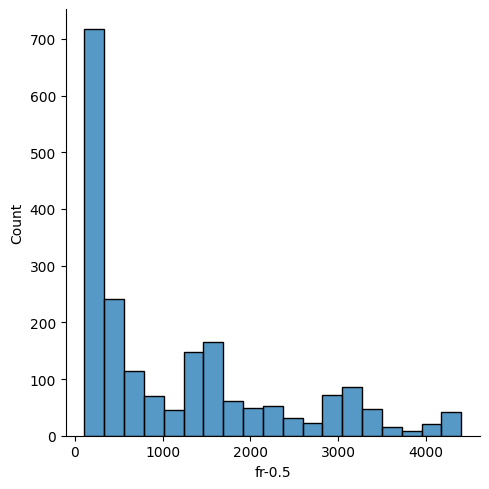

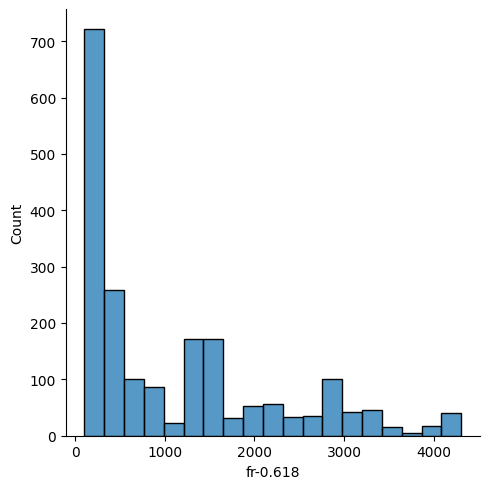

In [81]:
sns.displot(x="fr-0.236", data=df)
sns.displot(x="fr-0.382", data=df)
sns.displot(x="fr-0.5", data=df)
sns.displot(x="fr-0.618", data=df)

plt.show()

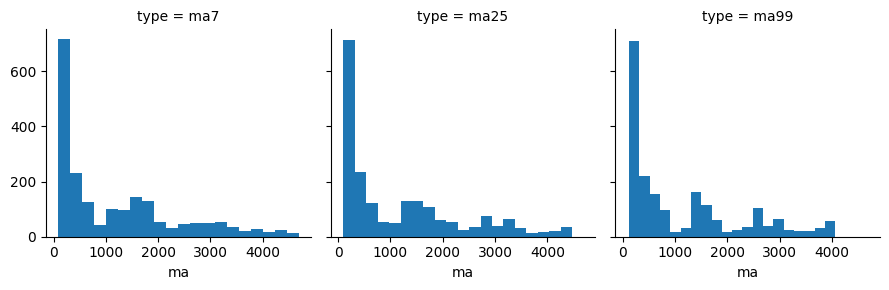

In [61]:
ma7 = pd.DataFrame({"ma": df["ma7"], "type": "ma7"})
ma25 = pd.DataFrame({"ma": df["ma25"], "type": "ma25"})
ma99 = pd.DataFrame({"ma": df["ma99"], "type": "ma99"})

result = pd.concat([ma7, ma25, ma99])
g = sns.FacetGrid(result, col="type")
g.map(plt.hist, "ma", bins=20)

<Axes: >

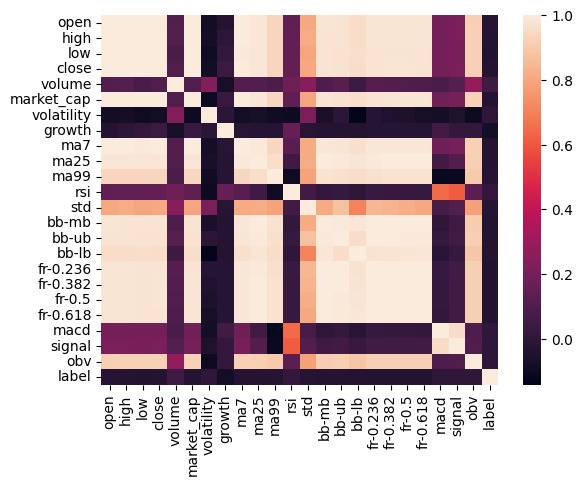

In [82]:
df_corr = df.drop(columns=["timestamp"])
sns.heatmap(df_corr.corr(), annot=False)

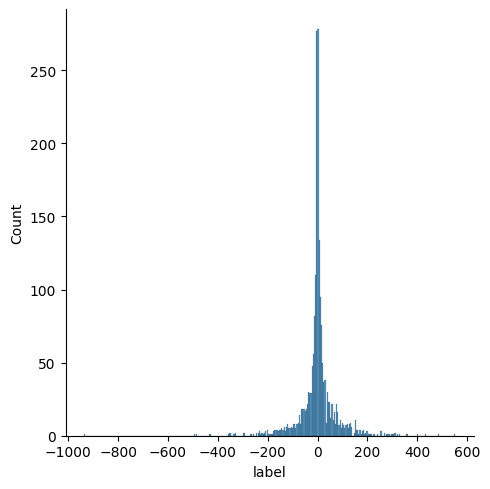

In [83]:
sns.displot(x="label", data=df)

<Axes: xlabel='label'>

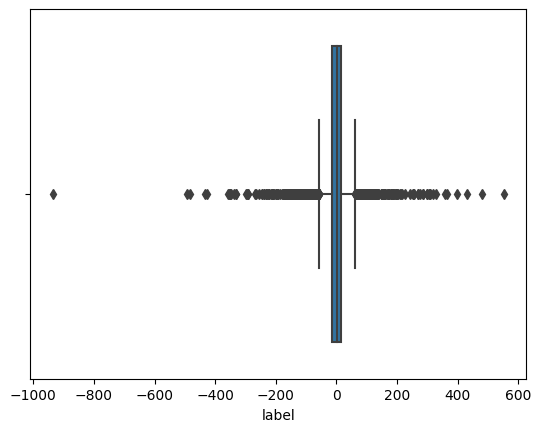

In [84]:
sns.boxplot(x="label", data=df)

<Axes: xlabel='label'>

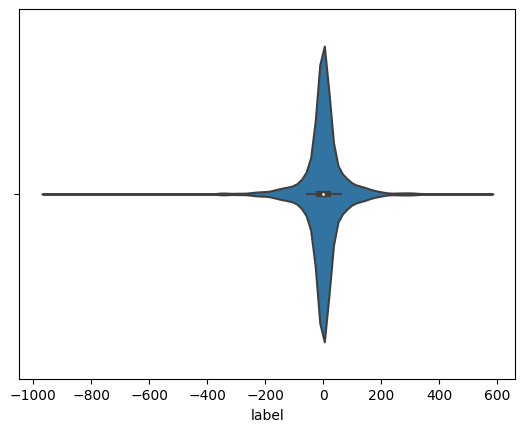

In [85]:
sns.violinplot(x="label", data=df)

((array([-3.39355264, -3.14258018, -3.00337891, ...,  3.00337891,
          3.14258018,  3.39355264]),
  array([-936.16, -492.1 , -483.28, ...,  430.47,  481.71,  551.8 ])),
 (68.89237184768639, 0.6922498755599858, 0.8775443986069277))

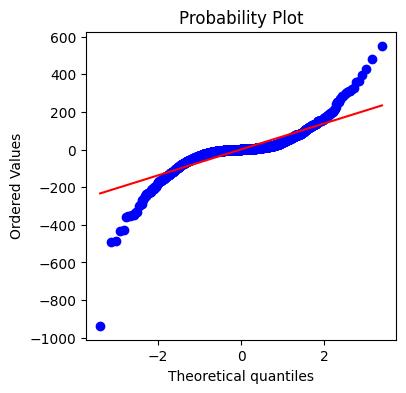

In [64]:
fid, ax = plt.subplots(figsize=(4, 4))
stats.probplot(df["label"], plot=ax)

In [100]:
df_np = df.to_numpy()
labels = []
for i in range(df_np.shape[0]-PERIODS):
    labels.append(df_np[i:i+PERIODS, -1])

In [103]:
labels_df = pd.DataFrame(labels)
labels_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,63.97,-5.75,1.84,9.47,-6.15,-44.47,5.51,29.46,0.10,2.99,...,-7.79,-12.21,-148.03,5.19,17.67,55.55,36.88,-10.11,-32.00,24.49
1,-5.75,1.84,9.47,-6.15,-44.47,5.51,29.46,0.10,2.99,6.37,...,-12.21,-148.03,5.19,17.67,55.55,36.88,-10.11,-32.00,24.49,-51.84
2,1.84,9.47,-6.15,-44.47,5.51,29.46,0.10,2.99,6.37,-14.40,...,-148.03,5.19,17.67,55.55,36.88,-10.11,-32.00,24.49,-51.84,53.97
3,9.47,-6.15,-44.47,5.51,29.46,0.10,2.99,6.37,-14.40,-41.25,...,5.19,17.67,55.55,36.88,-10.11,-32.00,24.49,-51.84,53.97,21.98
4,-6.15,-44.47,5.51,29.46,0.10,2.99,6.37,-14.40,-41.25,-7.17,...,17.67,55.55,36.88,-10.11,-32.00,24.49,-51.84,53.97,21.98,100.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,-9.39,28.06,-44.66,29.51,-169.78,9.24,-94.20,25.39,-12.17,-20.17,...,-46.53,13.14,-12.34,4.09,17.00,8.00,-2.09,-21.56,11.76,7.11
1969,28.06,-44.66,29.51,-169.78,9.24,-94.20,25.39,-12.17,-20.17,24.26,...,13.14,-12.34,4.09,17.00,8.00,-2.09,-21.56,11.76,7.11,-14.51
1970,-44.66,29.51,-169.78,9.24,-94.20,25.39,-12.17,-20.17,24.26,-0.09,...,-12.34,4.09,17.00,8.00,-2.09,-21.56,11.76,7.11,-14.51,12.44
1971,29.51,-169.78,9.24,-94.20,25.39,-12.17,-20.17,24.26,-0.09,42.67,...,4.09,17.00,8.00,-2.09,-21.56,11.76,7.11,-14.51,12.44,36.69


In [147]:
df

,timestamp,open,high,low,close,volume,market_cap,volatility,growth,ma7,...,bb-ub,bb-lb,fr-0.236,fr-0.382,fr-0.5,fr-0.618,macd,signal,obv,label
0,2017-11-23,380.63,425.00,370.02,405.00,25409.00111,3.934041e+10,0.216828,24.37,363.890000,...,372.721883,256.430895,375.75724,357.66638,343.045,328.42362,10.624226,6.039543,-7.567202e+03,63.97
1,2017-11-24,405.03,475.00,392.80,469.00,30398.35831,4.556002e+10,0.257292,63.97,383.571429,...,396.622894,241.437662,424.65324,397.21838,375.045,352.87162,14.425279,7.564222,2.283116e+04,-5.75
2,2017-11-25,467.57,484.47,450.00,461.82,21428.63117,4.474109e+10,0.257489,-5.75,400.022857,...,414.219154,232.580846,424.65324,397.21838,375.045,352.87162,17.104767,9.298867,1.402526e+03,1.84
3,2017-11-26,461.00,465.00,436.14,462.84,21691.11759,4.523564e+10,0.255834,1.84,415.550000,...,429.523336,226.382219,424.65324,397.21838,375.045,352.87162,19.157294,11.091308,2.309364e+04,9.47
4,2017-11-27,462.84,486.94,453.00,472.31,23761.11416,4.611156e+10,0.254129,9.47,430.534286,...,444.552269,221.271064,427.18208,399.26396,376.700,354.13604,20.999677,12.892830,4.685476e+04,-6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,2023-05-20,1812.31,1828.87,1807.06,1819.42,127754.43490,2.189539e+11,0.144975,7.11,1813.434286,...,2061.314818,1709.170182,2042.11868,1994.76066,1956.485,1918.20934,-11.476622,-9.394929,4.024289e+07,-14.51
2005,2023-05-21,1819.42,1828.98,1797.21,1804.91,161517.80530,2.170329e+11,0.145031,-14.51,1814.248571,...,2040.586341,1714.026992,2042.11868,1994.76066,1956.485,1918.20934,-11.555674,-9.787792,4.008137e+07,12.44
2006,2023-05-22,1804.91,1828.27,1792.01,1817.35,237498.94230,2.185938e+11,0.144374,12.44,1814.412857,...,2010.799256,1727.074077,2030.52880,1985.38560,1948.900,1912.41440,-11.042757,-10.015968,4.031887e+07,36.69
2007,2023-05-23,1817.36,1872.50,1815.24,1854.05,396869.60970,2.230197e+11,0.145263,36.69,1818.675714,...,1986.078376,1739.575513,2030.52880,1985.38560,1948.900,1912.41440,-9.140811,-9.856848,4.071574e+07,-54.17


In [146]:
df_df_np = pd.DataFrame(df_np)
df_df_np

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2017-11-23,380.63,425.0,370.02,405.0,25409.00111,39340408035.900002,0.216828,24.37,363.89,...,372.721883,256.430895,375.75724,357.66638,343.045,328.42362,10.624226,6.039543,-7567.20153,63.97
1,2017-11-24,405.03,475.0,392.8,469.0,30398.35831,45560021462.300003,0.257292,63.97,383.571429,...,396.622894,241.437662,424.65324,397.21838,375.045,352.87162,14.425279,7.564222,22831.15678,-5.75
2,2017-11-25,467.57,484.47,450.0,461.82,21428.63117,44741093552.300003,0.257489,-5.75,400.022857,...,414.219154,232.580846,424.65324,397.21838,375.045,352.87162,17.104767,9.298867,1402.52561,1.84
3,2017-11-26,461.0,465.0,436.14,462.84,21691.11759,45235644661.599998,0.255834,1.84,415.55,...,429.523336,226.382219,424.65324,397.21838,375.045,352.87162,19.157294,11.091308,23093.6432,9.47
4,2017-11-27,462.84,486.94,453.0,472.31,23761.11416,46111561438.199997,0.254129,9.47,430.534286,...,444.552269,221.271064,427.18208,399.26396,376.7,354.13604,20.999677,12.89283,46854.75736,-6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,2023-05-20,1812.31,1828.87,1807.06,1819.42,127754.4349,218953899552.529999,0.144975,7.11,1813.434286,...,2061.314818,1709.170182,2042.11868,1994.76066,1956.485,1918.20934,-11.476622,-9.394929,40242892.01217,-14.51
2005,2023-05-21,1819.42,1828.98,1797.21,1804.91,161517.8053,217032947920.339996,0.145031,-14.51,1814.248571,...,2040.586341,1714.026992,2042.11868,1994.76066,1956.485,1918.20934,-11.555674,-9.787792,40081374.20687,12.44
2006,2023-05-22,1804.91,1828.27,1792.01,1817.35,237498.9423,218593840135.540009,0.144374,12.44,1814.412857,...,2010.799256,1727.074077,2030.5288,1985.3856,1948.9,1912.4144,-11.042757,-10.015968,40318873.14917,36.69
2007,2023-05-23,1817.36,1872.5,1815.24,1854.05,396869.6097,223019695977.429993,0.145263,36.69,1818.675714,...,1986.078376,1739.575513,2030.5288,1985.3856,1948.9,1912.4144,-9.140811,-9.856848,40715742.75887,-54.17


In [ ]:
for sample in labels:
    sample_max = np.max(sample)
    sample_min = np.min(sample)
    sample_diff = sample_max - sample_min
    sample_mean = np.mean(sample)
    sample_sigma = np.std(sample)

In [121]:
sample = labels[-1]

def get_stats(sample, multiplier=1):
    sample_max = np.max(sample)*multiplier
    sample_min = np.min(sample)*multiplier
    sample_diff = (sample_max - sample_min)
    sample_mean = np.mean(sample)*multiplier
    sample_sigma = np.std(sample)*multiplier
    return sample_max, sample_min, sample_diff, sample_mean, sample_sigma

sample_max, sample_min, sample_diff, sample_mean, sample_sigma = get_stats(sample)

def normalize(sample_max, sample_min, sample_diff, sample_mean, sample_sigma):
    return (sample - sample_mean) / sample_sigma

sample_norm = normalize(sample_max, sample_min, sample_diff, sample_mean, sample_sigma)

sample_max_norm, sample_min_norm, sample_diff_norm, sample_mean_norm, sample_sigma_norm = get_stats(sample_norm, multiplier=sample_sigma)

print("Sample")
print(sample)
print("Sample normalized")
print(sample_norm*sample_sigma)
print("Sample stats")
print(sample_max, sample_min, sample_diff, sample_mean, sample_sigma)
print("Sample normalized stats")
print(sample_max_norm, sample_min_norm, sample_diff_norm, sample_mean_norm, sample_sigma_norm)

Sample
[-169.7800000000002 9.240000000000007 -94.20000000000005 25.3900000000001
 -12.170000000000073 -20.170000000000076 24.25999999999999
 -0.0899999999999181 42.67000000000007 -17.74000000000001
 16.86999999999989 -37.700000000000045 -39.34999999999991
 39.34999999999991 35.02999999999997 -28.049999999999955
 116.23000000000002 -96.97000000000004 -25.92999999999984
 -22.850000000000136 -1.0299999999999727 -5.690000000000055
 -46.52999999999997 13.1400000000001 -12.340000000000146
 4.0900000000001455 17.0 8.0 -2.090000000000145 -21.559999999999945
 11.759999999999993 7.110000000000127 -14.509999999999993
 12.439999999999827 36.690000000000055 -54.169999999999845]
Sample normalized
[-161.34527777777797 17.674722222222233 -85.76527777777783
 33.82472222222233 -3.7352777777778474 -11.735277777777853
 32.69472222222222 8.344722222222307 51.1047222222223 -9.305277777777784
 25.30472222222212 -29.265277777777815 -30.915277777777682
 47.784722222222136 43.4647222222222 -19.615277777777727
 

<Axes: ylabel='Count'>

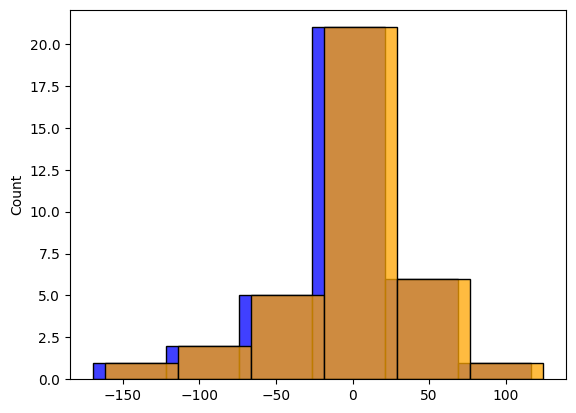

In [131]:
sns.histplot(sample, bins=6, color="blue")
sns.histplot(sample_norm*sample_sigma, bins=6, color="orange")

In [142]:
from constants import BUY, BUY_MAX, HOLD, SELL, SELL_MAX
def classify_label(sample, label):
    sample_max, sample_min, sample_diff, sample_mean, sample_sigma = get_stats(sample)
    sns.histplot(sample, bins=6, color="blue")
    print(sample_sigma)
    print(sample_mean)
    if label > sample_sigma+sample_mean:
        print(sample_mean+sample_sigma)
        return BUY_MAX
    elif label > sample_mean+sample_sigma/2:
        print(sample_mean+sample_sigma/2)
        return BUY
    elif label > sample_mean-sample_sigma/2:
        print(sample_mean-sample_sigma/2)
        return HOLD
    elif label > sample_mean-sample_sigma:
        print(sample_mean-sample_sigma)
        return SELL
    else:
        print(sample_mean-sample_sigma)
        return SELL_MAX

28.04976717515221
-12.699444444444433
-26.724328032020537


3

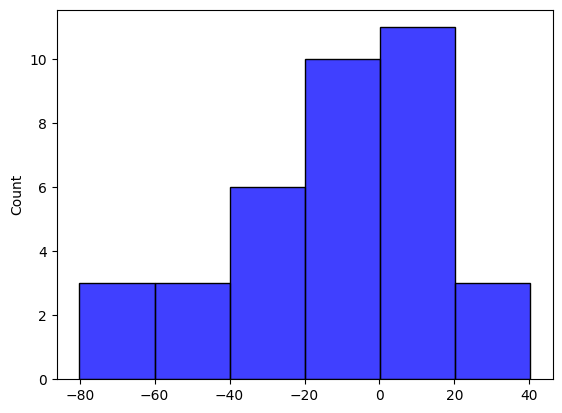

In [145]:
classify_label(labels[100], labels[101][-1])

In [134]:
print(labels[-1][-1])

-54.169999999999845


In [135]:
print(labels[-2])

[29.51000000000022 -169.7800000000002 9.240000000000007 -94.20000000000005
 25.3900000000001 -12.170000000000073 -20.170000000000076
 24.25999999999999 -0.0899999999999181 42.67000000000007
 -17.74000000000001 16.86999999999989 -37.700000000000045
 -39.34999999999991 39.34999999999991 35.02999999999997
 -28.049999999999955 116.23000000000002 -96.97000000000004
 -25.92999999999984 -22.850000000000136 -1.0299999999999727
 -5.690000000000055 -46.52999999999997 13.1400000000001
 -12.340000000000146 4.0900000000001455 17.0 8.0 -2.090000000000145
 -21.559999999999945 11.759999999999993 7.110000000000127
 -14.509999999999993 12.439999999999827 36.690000000000055]
